In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
def readColumnsFromFile(filename):
    '''reads in the raw data and returns a list of lists.
    the first list (returned[0]) is the x-coords. '''
    with open(filename) as infile:
        reader = csv.reader(infile, delimiter=" ")
        row_array = []
        
        for row in reader:
            row_data = [col.strip() for col in row]          
            row_array.append(row_data)
            
        #converts rows to columns and removes the last item in the columns list which is just spaces
        #this is an atrifact of the file printing system
        #also has zip output in lists not tuples
        col_array = [list(a) for a in zip(*row_array)]
        del col_array[-1]
        #convert list of lists of strings to list of lists of floats
        #return list([[float(j) for j in i] for i in col_array])
        return np.array([[float(j) for j in i] for i in col_array])

In [3]:
#FGTA simple MIC curves no death
FGTA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

FGTA_simple_c_05_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=0.5-spatialDistribution-FINAL.txt')
FGTA_simple_c_05_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=0.5-gRateDistribution-FINAL.txt')
FGTA_simple_c_1_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=1.0-spatialDistribution-FINAL.txt')
FGTA_simple_c_1_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=1.0-gRateDistribution-FINAL.txt')
FGTA_simple_c_2_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=2.0-spatialDistribution-FINAL.txt')
FGTA_simple_c_2_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#SGTA simple MIC curves no death
SGTA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_simple_c_05_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=0.5-spatialDistribution-FINAL.txt')
SGTA_simple_c_05_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=0.5-gRateDistribution-FINAL.txt')
SGTA_simple_c_1_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=1.0-spatialDistribution-FINAL.txt')
SGTA_simple_c_1_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=1.0-gRateDistribution-FINAL.txt')
SGTA_simple_c_2_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=2.0-spatialDistribution-FINAL.txt')
SGTA_simple_c_2_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#GITA (growth rate independent - flat mic) simple MIC curves no death
GITA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
GITA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
GITA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
GITA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#Realistic growth curves
FGTA_realistic_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_realistic_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_realistic_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_realistic_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_realistic_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_realistic_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_realistic_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_realistic_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#Realistic beta-swapped curves
FGTA_realistic_BS_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_realistic_BS_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')



#With death
FGTA_wDeath_alpha_specificAlpha_aliveSpatial = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-aliveSpatialDistribution-FINAL.txt')
FGTA_wDeath_alpha_specificAlpha_deadSpatial = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-deadSpatialDistribution-FINAL.txt')
FGTA_wDeath_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')

SGTA_wDeath_alpha_specificAlpha_aliveSpatial = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-aliveSpatialDistribution-FINAL.txt')
SGTA_wDeath_alpha_specificAlpha_deadSpatial = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-deadSpatialDistribution-FINAL.txt')
SGTA_wDeath_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')




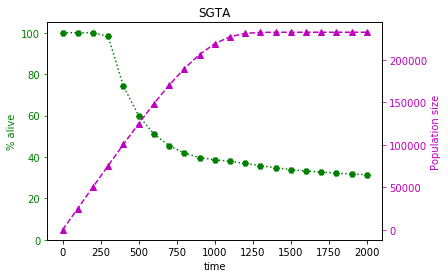

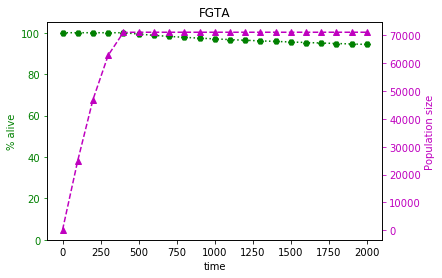

In [4]:
def percentAliveAndSizeOverTime(alive_data, dead_data, title):
    
    pc_alive_t = []
    size_of_pop_t = []
    t = [i for i in np.linspace(0., 2000., 21)]
    
    
    for live_pop, dead_pop in zip(alive_data[1:], dead_data[1:]):
        
        num_alive = sum(live_pop)
        num_dead = sum(dead_pop)
        
        size_of_pop_t.append(num_alive+num_dead)
        pc_alive_t.append((num_alive/(num_alive+num_dead))*100.)

        
    fig, ax1 = plt.subplots()
    ax1.plot(t, pc_alive_t, 'gH:')
    ax1.set_xlabel('time')
    ax1.set_ylabel('% alive', color='g')
    ax1.tick_params('y', colors='g')
    ax1.set_ylim(0, 105.)
    
    ax2 = ax1.twinx()
    ax2.plot(t, size_of_pop_t, 'm^--')
    ax2.set_ylabel('Population size', color='m')
    ax2.tick_params('y', colors='m')
    
    #fig.tight_layout()
    plt.title(title)
    plt.savefig(title+'-percentAlive-PopSize-overTime.png')
    plt.show()
    
percentAliveAndSizeOverTime(SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_wDeath_alpha_specificAlpha_deadSpatial, "SGTA")
percentAliveAndSizeOverTime(FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_wDeath_alpha_specificAlpha_deadSpatial, "FGTA") 

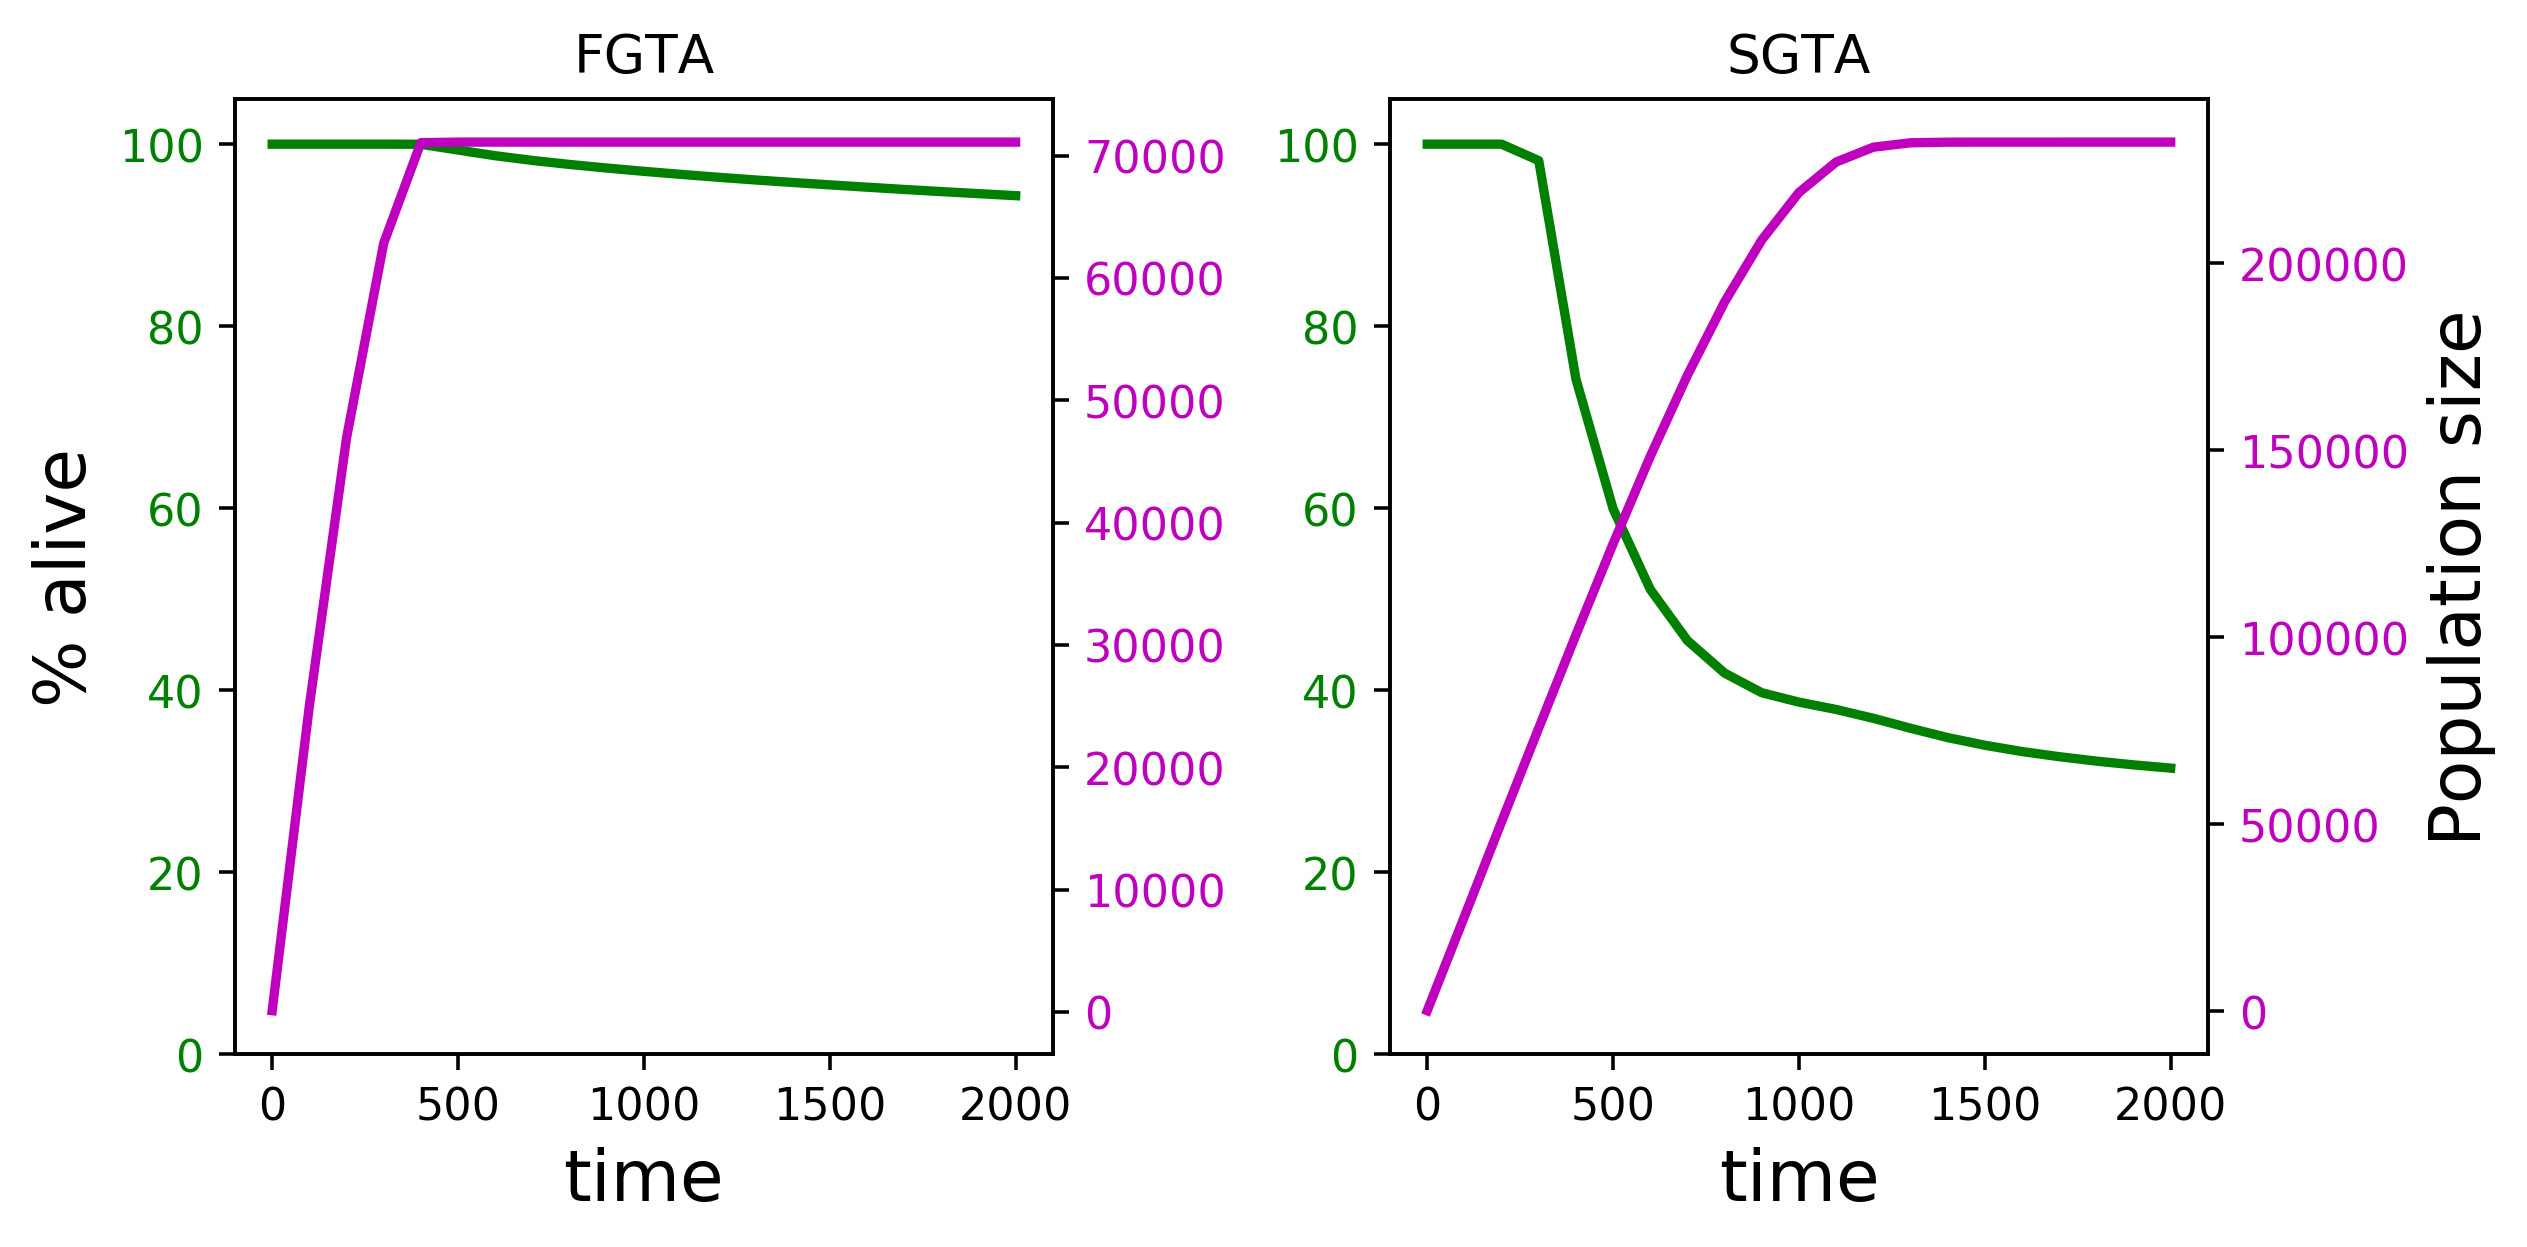

In [5]:
def percentAliveOverTimeSideBySide(FGTA_alive_data, FGTA_dead_data, SGTA_alive_data, SGTA_dead_data):
    '''This makes one plot of both the percentage plots'''
    
    FGTA_pc_alive_t = []
    FGTA_size_of_pop_t = []
    SGTA_pc_alive_t = []
    SGTA_size_of_pop_t = []
    t = [i for i in np.linspace(0., 2000., 21)]
    
    #this combines all the lists together in a way which allows us to iterate over them all in one loop
    for FGTA_alive_pop, FGTA_dead_pop, SGTA_alive_pop, SGTA_dead_pop in zip(FGTA_alive_data[1:], FGTA_dead_data[1:], SGTA_alive_data[1:], SGTA_dead_data[1:]):
        
        FGTA_num_alive = sum(FGTA_alive_pop)
        FGTA_num_dead = sum(FGTA_dead_pop)
        
        SGTA_num_alive = sum(SGTA_alive_pop)
        SGTA_num_dead = sum(SGTA_dead_pop)
        
        FGTA_size_of_pop_t.append(FGTA_num_alive+FGTA_num_dead)
        FGTA_pc_alive_t.append((FGTA_num_alive/(FGTA_num_alive+FGTA_num_dead))*100.)
        
        SGTA_size_of_pop_t.append(SGTA_num_alive+SGTA_num_dead)
        SGTA_pc_alive_t.append((SGTA_num_alive/(SGTA_num_alive+SGTA_num_dead))*100.)
        
    
    #here we do all the plotting
    pc_colour, pc_marker = ['g', 'H']
    num_colour, num_marker = ['m', '^']
    
    def two_scales(ax1, time, data1, data2, c1, c2, m1, m2):
        ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, linewidth=2.1)
        ax1.set_xlabel('time', fontsize=16)
        #ax1.set_ylabel('% alive')
        ax1.set_ylim([0.,105.])
        ax2.plot(time, data2, color=c2, linewidth=2.1)
        #ax2.set_ylabel('Population size')
        return ax1, ax2
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=320)
    ax1, ax1a = two_scales(ax1, t, FGTA_pc_alive_t, FGTA_size_of_pop_t, pc_colour, num_colour, pc_marker, num_marker)
    ax2, ax2a = two_scales(ax2, t, SGTA_pc_alive_t, SGTA_size_of_pop_t, pc_colour, num_colour, pc_marker, num_marker)

    # Change color of each axis
    def color_y_axis(ax, color):
        """Color your axes."""
        for t in ax.get_yticklabels():
            t.set_color(color)

    color_y_axis(ax1, pc_colour)
    color_y_axis(ax1a, num_colour)
    color_y_axis(ax2, pc_colour)
    color_y_axis(ax2a, num_colour)
    
    ax1.set_ylabel('% alive', fontsize=16)
    ax2a.set_ylabel('Population size', fontsize=16)
    ax1.set_title("FGTA")
    ax2.set_title("SGTA")
    plt.tight_layout()
    plt.savefig('bothAntibiotics-percentAlive-PopSize-overTime.png')
    #plt.show()  
    
percentAliveOverTimeSideBySide(FGTA_alive_data=FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_dead_data=FGTA_wDeath_alpha_specificAlpha_deadSpatial, SGTA_alive_data=SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_dead_data=SGTA_wDeath_alpha_specificAlpha_deadSpatial)


In [6]:
def plotAllMeasurementsIndividually(data, title, yLabel, antibiotic_type='SGTA', alphaVal='specific_alpha'):
    '''This plots each time measurement individually and saves them in a breakdown folder.'''
    
    timestep = 100.
    max_value = np.amax(data[1:])
    min_value = np.amin(data[1:])
    
    for i in range(1, len(data)):
        plt.gcf().clear()
        plt.ylim(min_value+(0.1*min_value), max_value+(0.1*max_value))
        plt.plot(data[0], data[i], linewidth=2.5)
        plt.title(antibiotic_type+' '+title+' - t ='+str(timestep*(i-1)))
        plt.axhline(0, color='black')
        plt.xlabel('Microhabitat')
        plt.ylabel(yLabel)
        
        plt.savefig(antibiotic_type+'-'+title+'-breakdown/'+antibiotic_type+'-alpha='+alphaVal+'-'+
                    title+'-t='+str(timestep*(i-1))+'.png')
        plt.gcf().clear()
        
    for measurement in data[1:]:
        plt.plot(data[0], measurement, linewidth=2.5)
        plt.title(antibiotic_type+' '+title+' (all)')
        plt.xlabel('Microhabitat')
        plt.ylabel(yLabel)
    plt.axhline(0, color='black')
    plt.savefig(antibiotic_type+'-'+title+'-breakdown/'+antibiotic_type+'-alpha='+alphaVal+'-'+title+'-all.png')

In [7]:
#Here the percentage alive plots are done side by side in the one figure
#percentAliveOverTimeSideBySide(FGTA_alive_data=FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_dead_data=FGTA_wDeath_alpha_specificAlpha_deadSpatial, SGTA_alive_data=SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_dead_data=SGTA_wDeath_alpha_specificAlpha_deadSpatial)
#percentAliveAndSizeOverTime(FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_wDeath_alpha_specificAlpha_deadSpatial, 'FGTA')
#percentAliveAndSizeOverTime(SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_wDeath_alpha_specificAlpha_deadSpatial, 'SGTA')


In [8]:
def plotThreeDistributionsSideBySide(data1, data2, data3, y_label, linColour, filename):
    
    max_value = max(np.amax(data1[1:]), np.amax(data2[1:]), np.amax(data3[1:]))
    min_value = min(np.amin(data1[1:]), np.amin(data2[1:]), np.amin(data3[1:]))
    max_value_X = max(np.amax(data1[0]), np.amax(data2[0]), np.amax(data3[0]))
    lineWidth = 1.5
    
    
    fig, axarr = plt.subplots(1, 3, sharey=True, figsize=(8,3), dpi=300)
    for i in range(1, len(data1)):
        if i%4 == 0:
            axarr[0].plot(data1[0], data1[i], linewidth=lineWidth, color='black')
            axarr[1].plot(data2[0], data2[i], linewidth=lineWidth, color='black')
            axarr[2].plot(data3[0], data3[i], linewidth=lineWidth, color='black')
        else:
            axarr[0].plot(data1[0], data1[i], linewidth=lineWidth, color=linColour)
            axarr[1].plot(data2[0], data2[i], linewidth=lineWidth, color=linColour)
            axarr[2].plot(data3[0], data3[i], linewidth=lineWidth, color=linColour)
            
    for ax in axarr:
        ax.set_xlim(0,500)
        ax.set_ylim(min_value+(0.1*min_value), max_value+(0.2*max_value))
        ax.tick_params(direction='in')
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value), xytext=(0.2*max_value_X, 1.06*max_value), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value, 'time', fontsize=12)
      
    
    
    axarr[0].set_title('FGTA')
    axarr[1].set_title('GITA')
    axarr[2].set_title('SGTA')
    
    axarr[0].text(0.85*max_value_X, 1.05*max_value, '(a)', fontsize=16)
    axarr[1].text(0.85*max_value_X, 1.05*max_value, '(b)', fontsize=16)
    axarr[2].text(0.85*max_value_X, 1.05*max_value, '(c)', fontsize=16)
    
    axarr[0].set_ylabel(y_label, fontsize=16)
    axarr[1].set_xlabel('Microhabitat', fontsize=16)
    
    plt.subplots_adjust(wspace=0.8)
    plt.tight_layout()
    plt.savefig(filename)
            
   
    
    

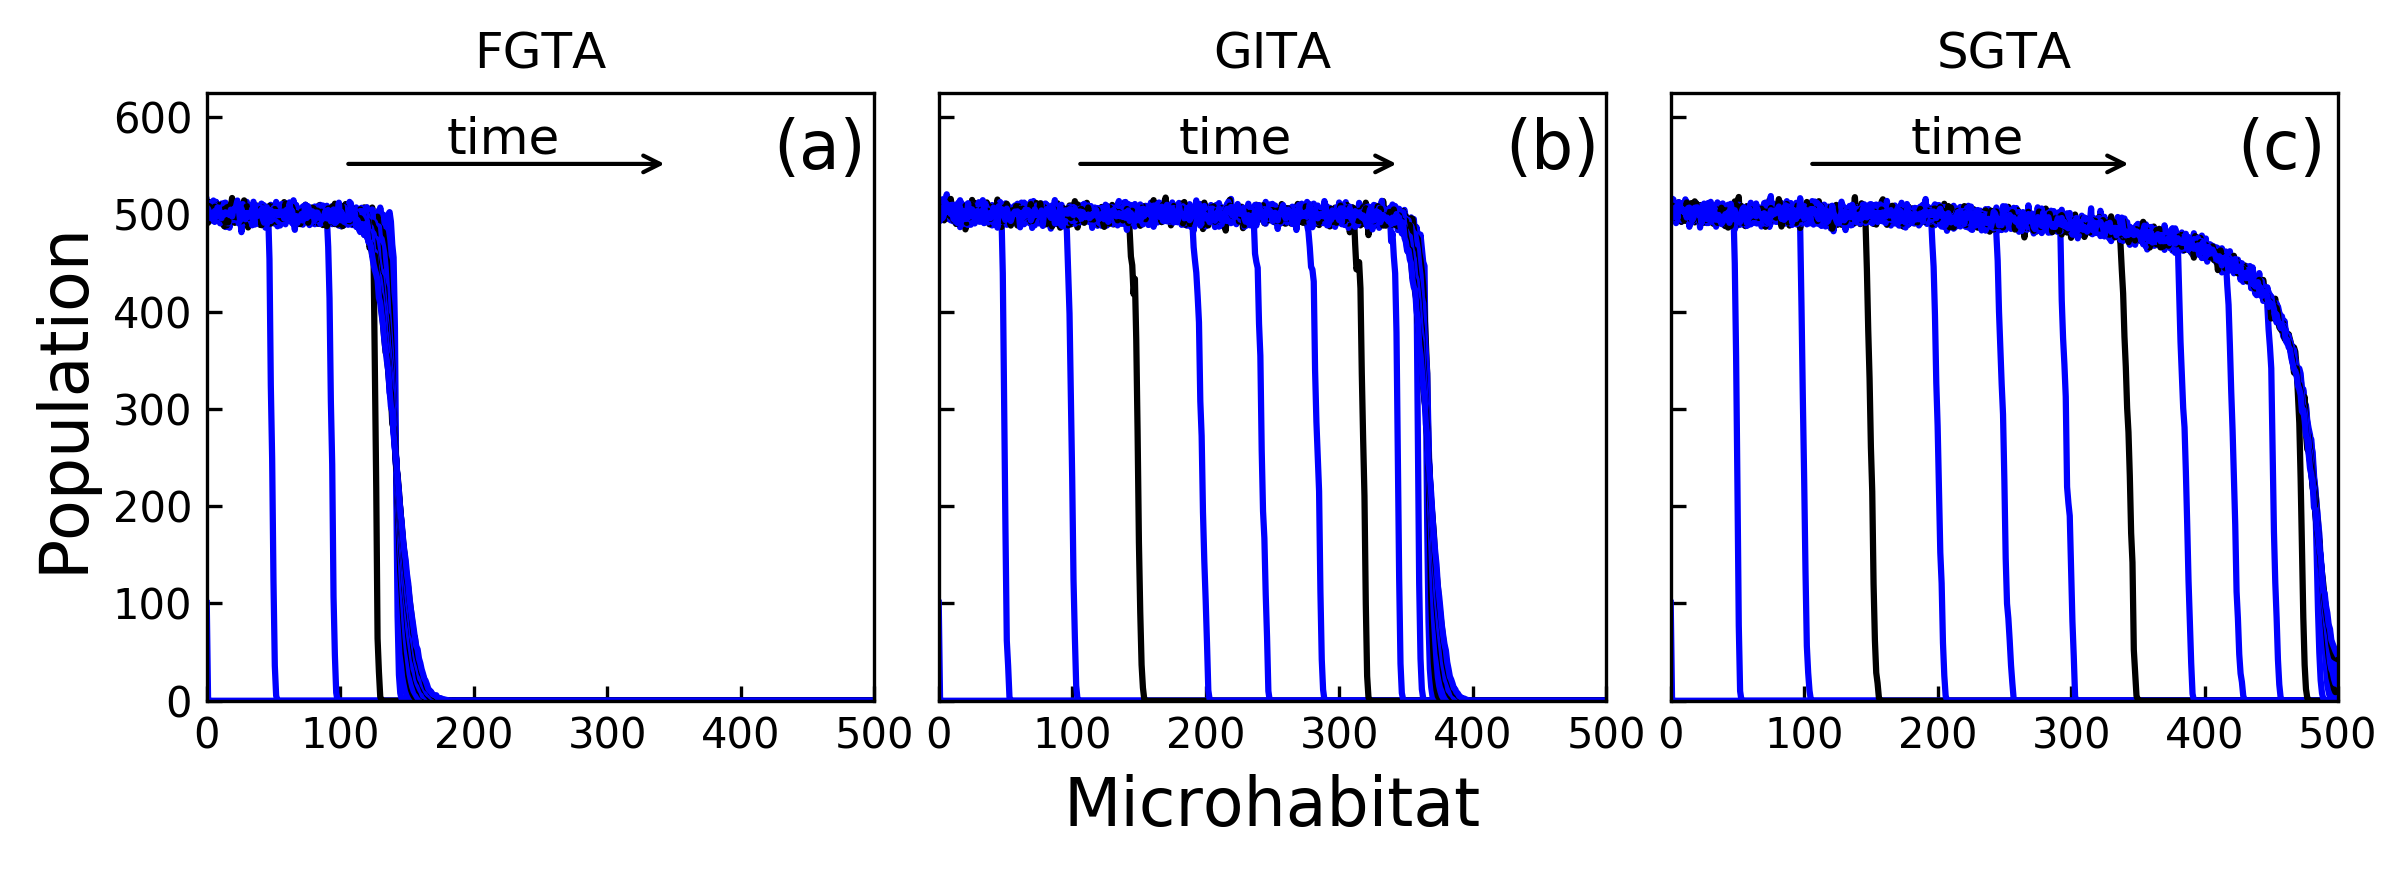

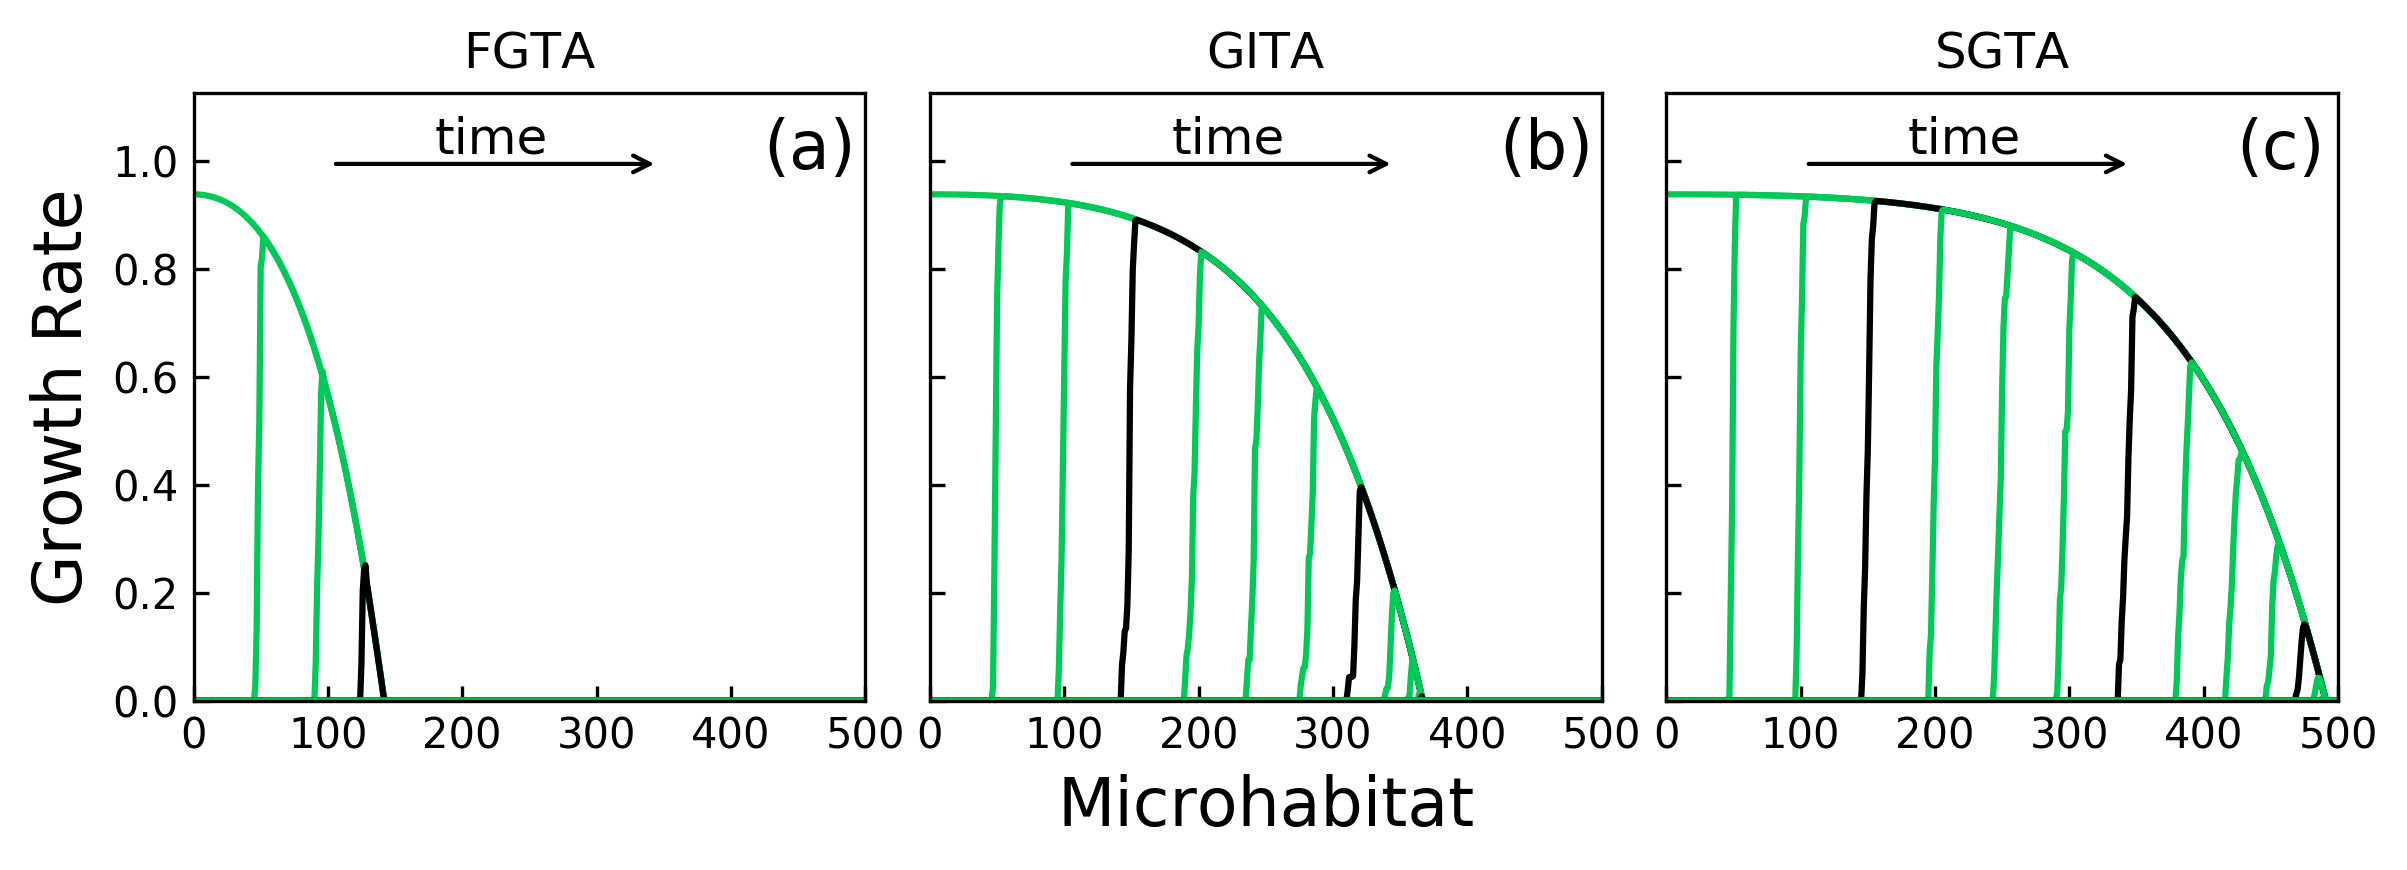

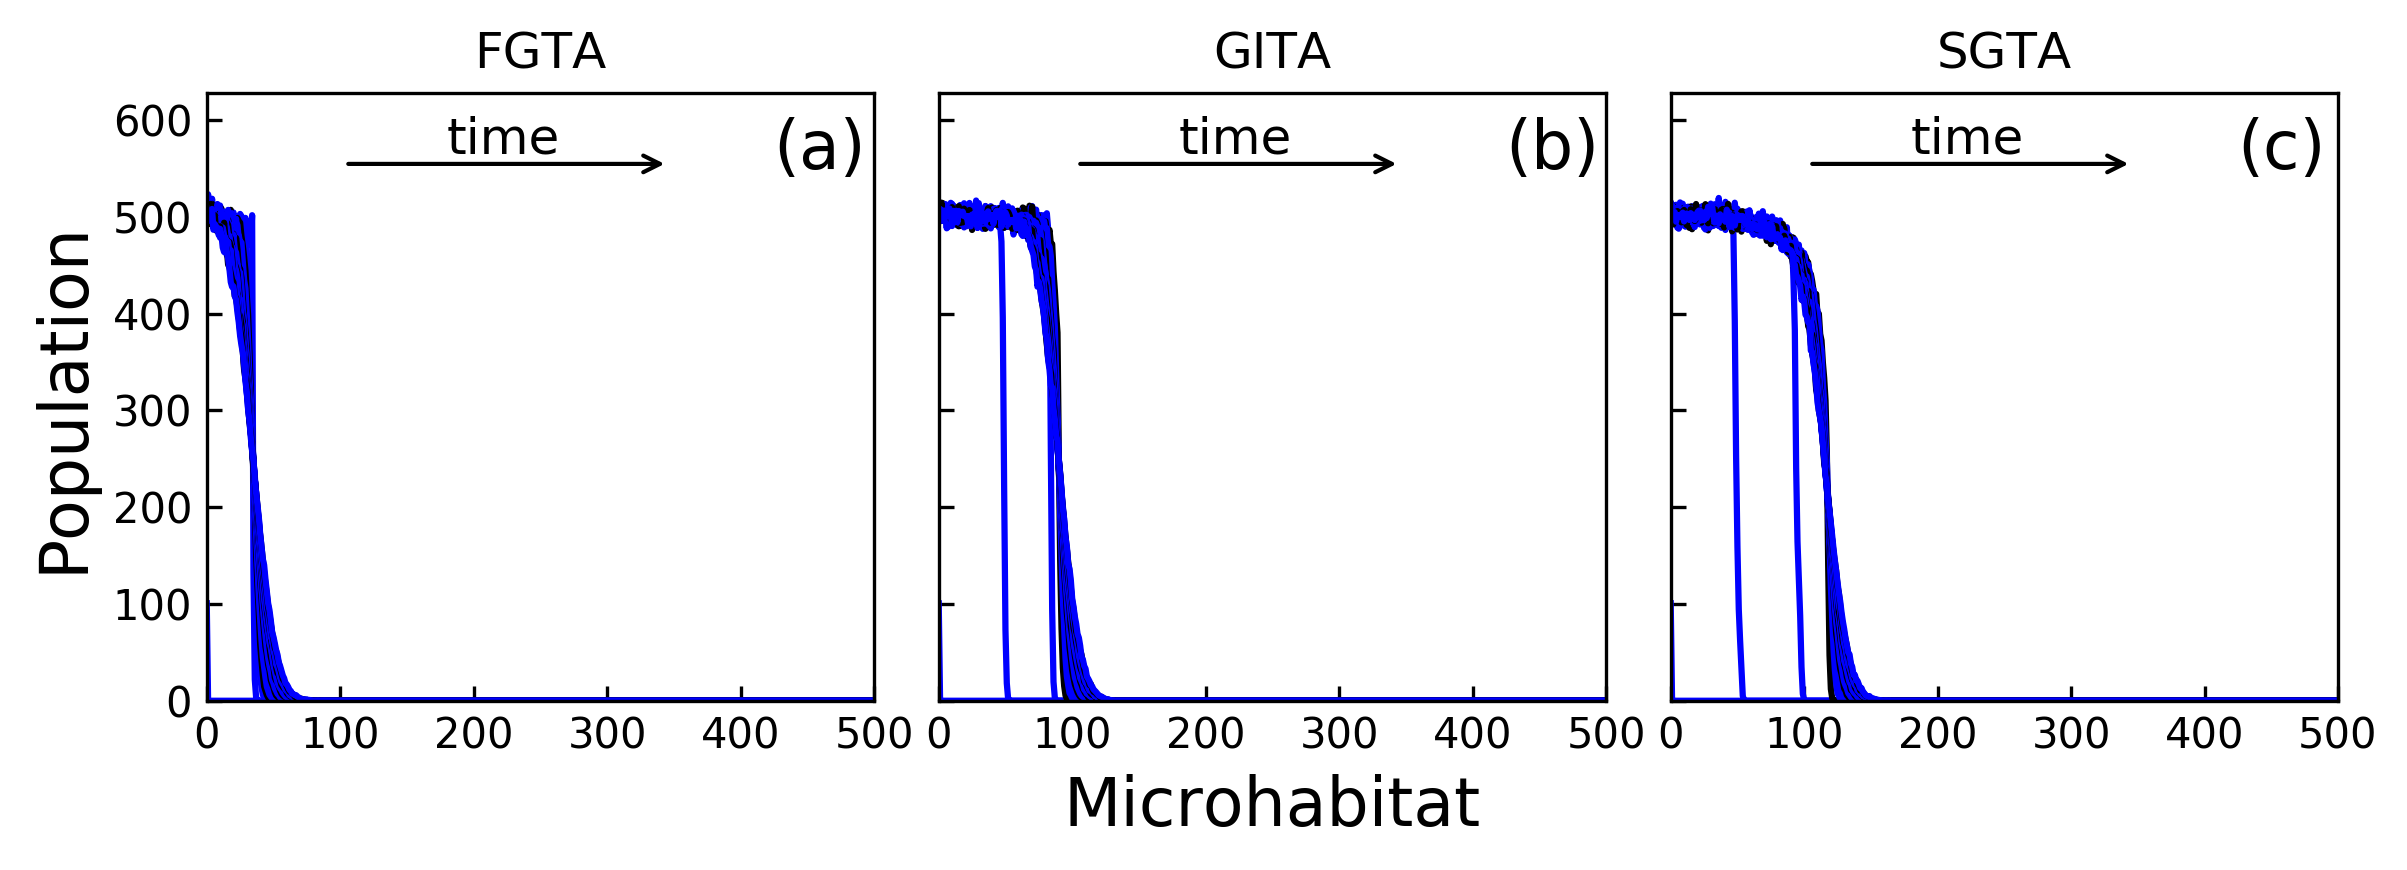

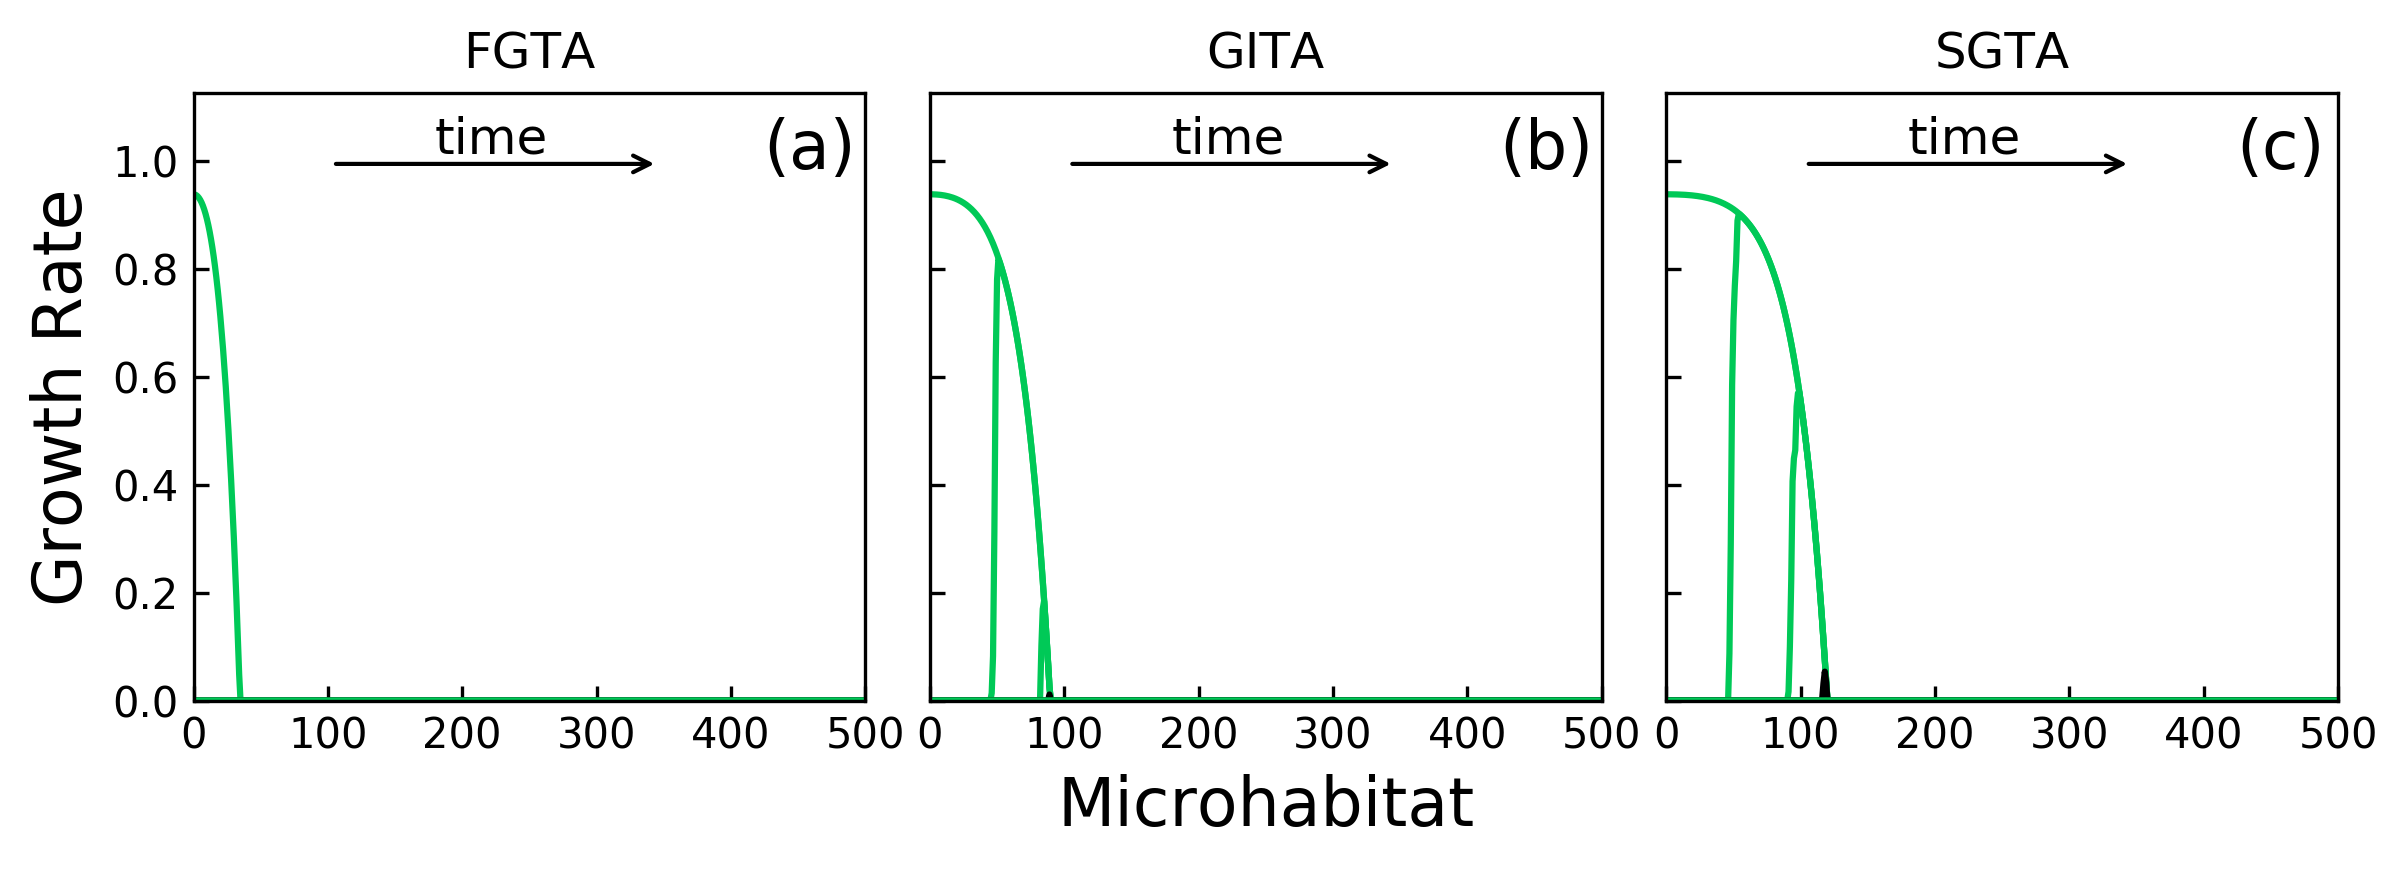

In [9]:
popColour = 'blue'
gRateColour = '#00C957'
popYLabel = 'Population'
gRateYLabel = 'Growth Rate'

string1 = 'simple-no_death-alpha=specific_alpha-spatialDistb.png'
plotThreeDistributionsSideBySide(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, popYLabel, popColour, string1)

string2 = 'simple-no_death-alpha=specific_alpha-gRateDistb.png'
plotThreeDistributionsSideBySide(FGTA_simple_alpha_specificAlpha_gRate, GITA_simple_alpha_specificAlpha_gRate, SGTA_simple_alpha_specificAlpha_gRate, gRateYLabel, gRateColour, string2)

string3 = 'simple-no_death-alpha=0.02-spatialDistb.png'
plotThreeDistributionsSideBySide(FGTA_simple_alpha_002_spatial, GITA_simple_alpha_002_spatial, SGTA_simple_alpha_002_spatial, popYLabel, popColour, string3)

string4 = 'simple-no_death-alpha=0.02-gRateDistb.png'
plotThreeDistributionsSideBySide(FGTA_simple_alpha_002_gRate, GITA_simple_alpha_002_gRate, SGTA_simple_alpha_002_gRate, gRateYLabel, gRateColour, string4)





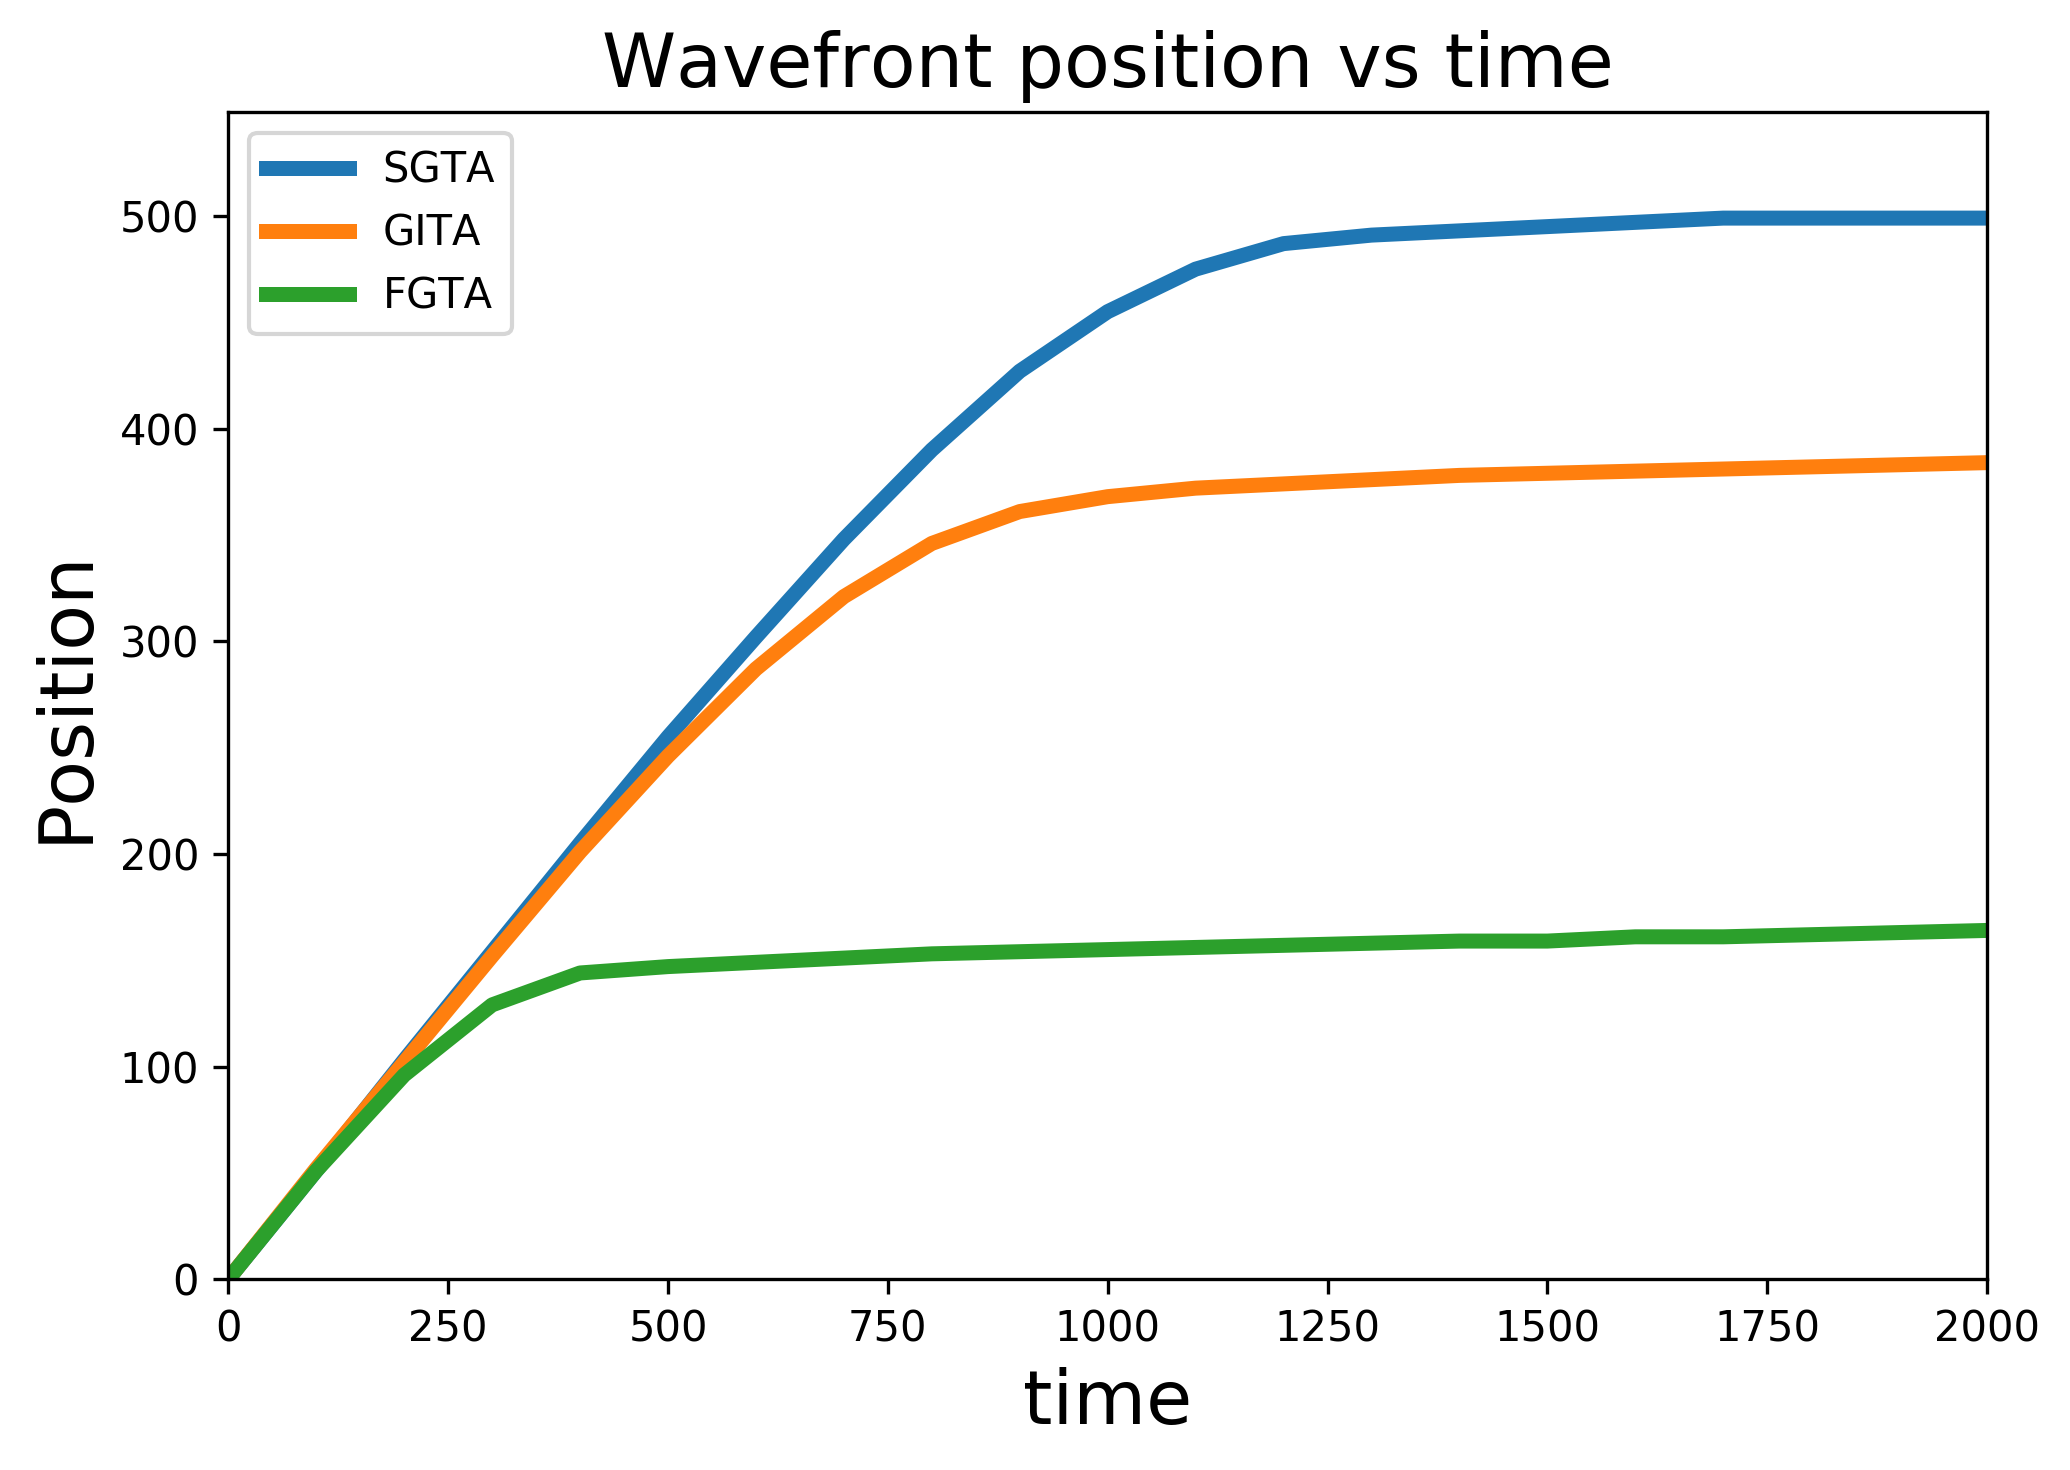

In [10]:
def plotWavefrontPositionsVsT(data1, data2, data3, filename):
    
    popThreshold = 20.
    t = [i for i in np.linspace(0., 2000., 21)]
    data1_wavefronts = []
    data2_wavefronts = []
    data3_wavefronts = []
    
    #here we iterate over the input data and get the max indices of the data where the population
    #is above a certain threshold. this gives us the wavefron position over time
    for i in range(1, len(data1)):
        data1_wavefronts.append(max((x, y) for x, y in enumerate(data1[i]) if y > popThreshold)[0])
        data2_wavefronts.append(max((x, y) for x, y in enumerate(data2[i]) if y > popThreshold)[0])
        data3_wavefronts.append(max((x, y) for x, y in enumerate(data3[i]) if y > popThreshold)[0])
    
    
    maxYVal = max(max(data1_wavefronts), max(data2_wavefronts), max(data3_wavefronts))
    
    
    lineWidth = 3.6
    #fig, axarr = plt.subplots(1, 3, sharey=True, figsize=(8,3), dpi=300)
    #axarr[0].plot(t, data1_wavefronts)
    #axarr[1].plot(t, data2_wavefronts)
    #axarr[2].plot(t, data3_wavefronts)
    #lets do them all in one plot, can change later if needs be
    plt.figure(figsize=(7,5), dpi=300)
    plt.plot(t, data3_wavefronts, linewidth=lineWidth, label='SGTA')
    plt.plot(t, data2_wavefronts, linewidth=lineWidth, label='GITA')
    plt.plot(t, data1_wavefronts, linewidth=lineWidth, label='FGTA')
   
    plt.legend(loc='upper left')
    
    plt.xlim(0, 2000)
    plt.ylim(0, 1.1*maxYVal)
    plt.xlabel("time", fontsize=18)
    plt.ylabel("Position", fontsize=18)
    plt.title("Wavefront position vs time", fontsize=18)
    
    plt.tight_layout()
    plt.savefig(filename)
    
    
filename='wavefront_position_vs_time_specificAlpha.png'
plotWavefrontPositionsVsT(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, filename)
    

[0.46, 0.45, 0.43, 0.45, 0.44, 0.43, 0.43, 0.44, 0.43, 0.43, 0.43, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


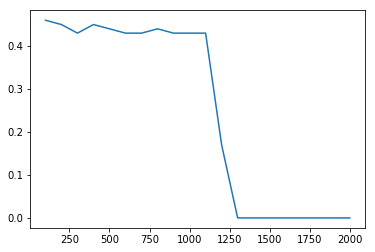

In [11]:
def plotWaveSpeeds(data_array):
    
    popThreshold = 20
    timestep = 100.
    wavespeedArray = []
    t = np.linspace(100., 2000., 20)
    
    
    
    '''def extractWavespeeds(data):
        wavespeeds = []
        for i in range(2, len(data)):
            #print(data[i])
            wavefront_posit = max((x, y) for x, y in enumerate(data[i]) if y > popThreshold)[0]
            prev_wavefront_posit = max((x, y) for x, y in enumerate(data[i-1]) if y > popThreshold)[0]
            wavespeeds.append((wavefront_posit-prev_wavefront_posit)/timestep)
        
        return wavespeeds
    
    for data in data_array:
        wavespeedArray.append(extractWavespeeds(data))
    '''
    
    wavespeedList = []
    #print(len(data_array))
    for i in range(2, len(data_array)):
        wavefront_posit = max((x, y) for x, y in enumerate(data_array[i]) if y > popThreshold)[0]
        prev_wavefront_posit = max((x, y) for x, y in enumerate(data_array[i-1]) if y > popThreshold)[0]
        wavespeedList.append((wavefront_posit-prev_wavefront_posit)/timestep)
        
    #wavespeedList.append(sub_dataWavespeeds)
    #del(sub_dataWavespeeds)
    #'''
    print(wavespeedList)
    plt.plot(t, wavespeedList)
    plt.show()
    
def bla(data):
    for i in range(1, len(data)):
        plt.plot(data[0], data[i], linewidth=1.8)
    plt.show()
    
datalist = [FGTA_simple_c_05_spatial, FGTA_simple_c_1_spatial]
#bla(datalist[0])
plotWaveSpeeds(FGTA_simple_c_05_spatial)

In [51]:
def plotWaveSpeeds2(data_array):
    '''this isnt working as sometimes there arent any microhabitats above the pop threshold'''
    
    popThreshold = 20
    timestep = 100.
    t = np.linspace(100., 2000., 20)
    waveSpeedArray = []
    
    def extractWavespeeds(input_data):
        wavespeedList = []
        #maxindices = np.where(input_data[2] > popThreshold)
        #print(np.amax(maxindices))
        #for i in range(2, len(input_data)):
         #   wavefront_posit = max((x, y) for x, y in enumerate(input_data[i]) if y > popThreshold)[0]
          #  prev_wavefront_posit = max((x, y) for x, y in enumerate(input_data[i-1]) if y > popThreshold)[0]
           # wavespeedList.append((wavefront_posit-prev_wavefront_posit)/timestep)
        for i in range(2, len(input_data)):
            #print(len(input_data[i]))
            #print(np.amax(np.where(input_data[i] > popThreshold)))
            print((np.where(input_data[i] > popThreshold)))
            #wavefront_x = np.amax(np.where(input_data[i] > popThreshold))
            #wavefront_prev_x = np.amax(np.where(input_data[i-1] > popThreshold))
        
        return wavespeedList
        
    for i in range(0, len(data_array)):
        print(len(data_array[1]))
        #print(type(data_array[i]))
        waveSpeedArray.append(extractWavespeeds(data_array[i]))
    #listo = extractWavespeeds(data_array[0]) 
    #print(listo)
    #for datums in data_array:
     #   waveSpeedArray.append(extractWavespeeds(datums))
    
    #print(waveSpeedArray)
    
    

datalist = [FGTA_simple_c_05_spatial, FGTA_simple_c_1_spatial]
#print(datalist)

plotWaveSpeeds2(datalist)      
        
        

22
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91]),)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        6

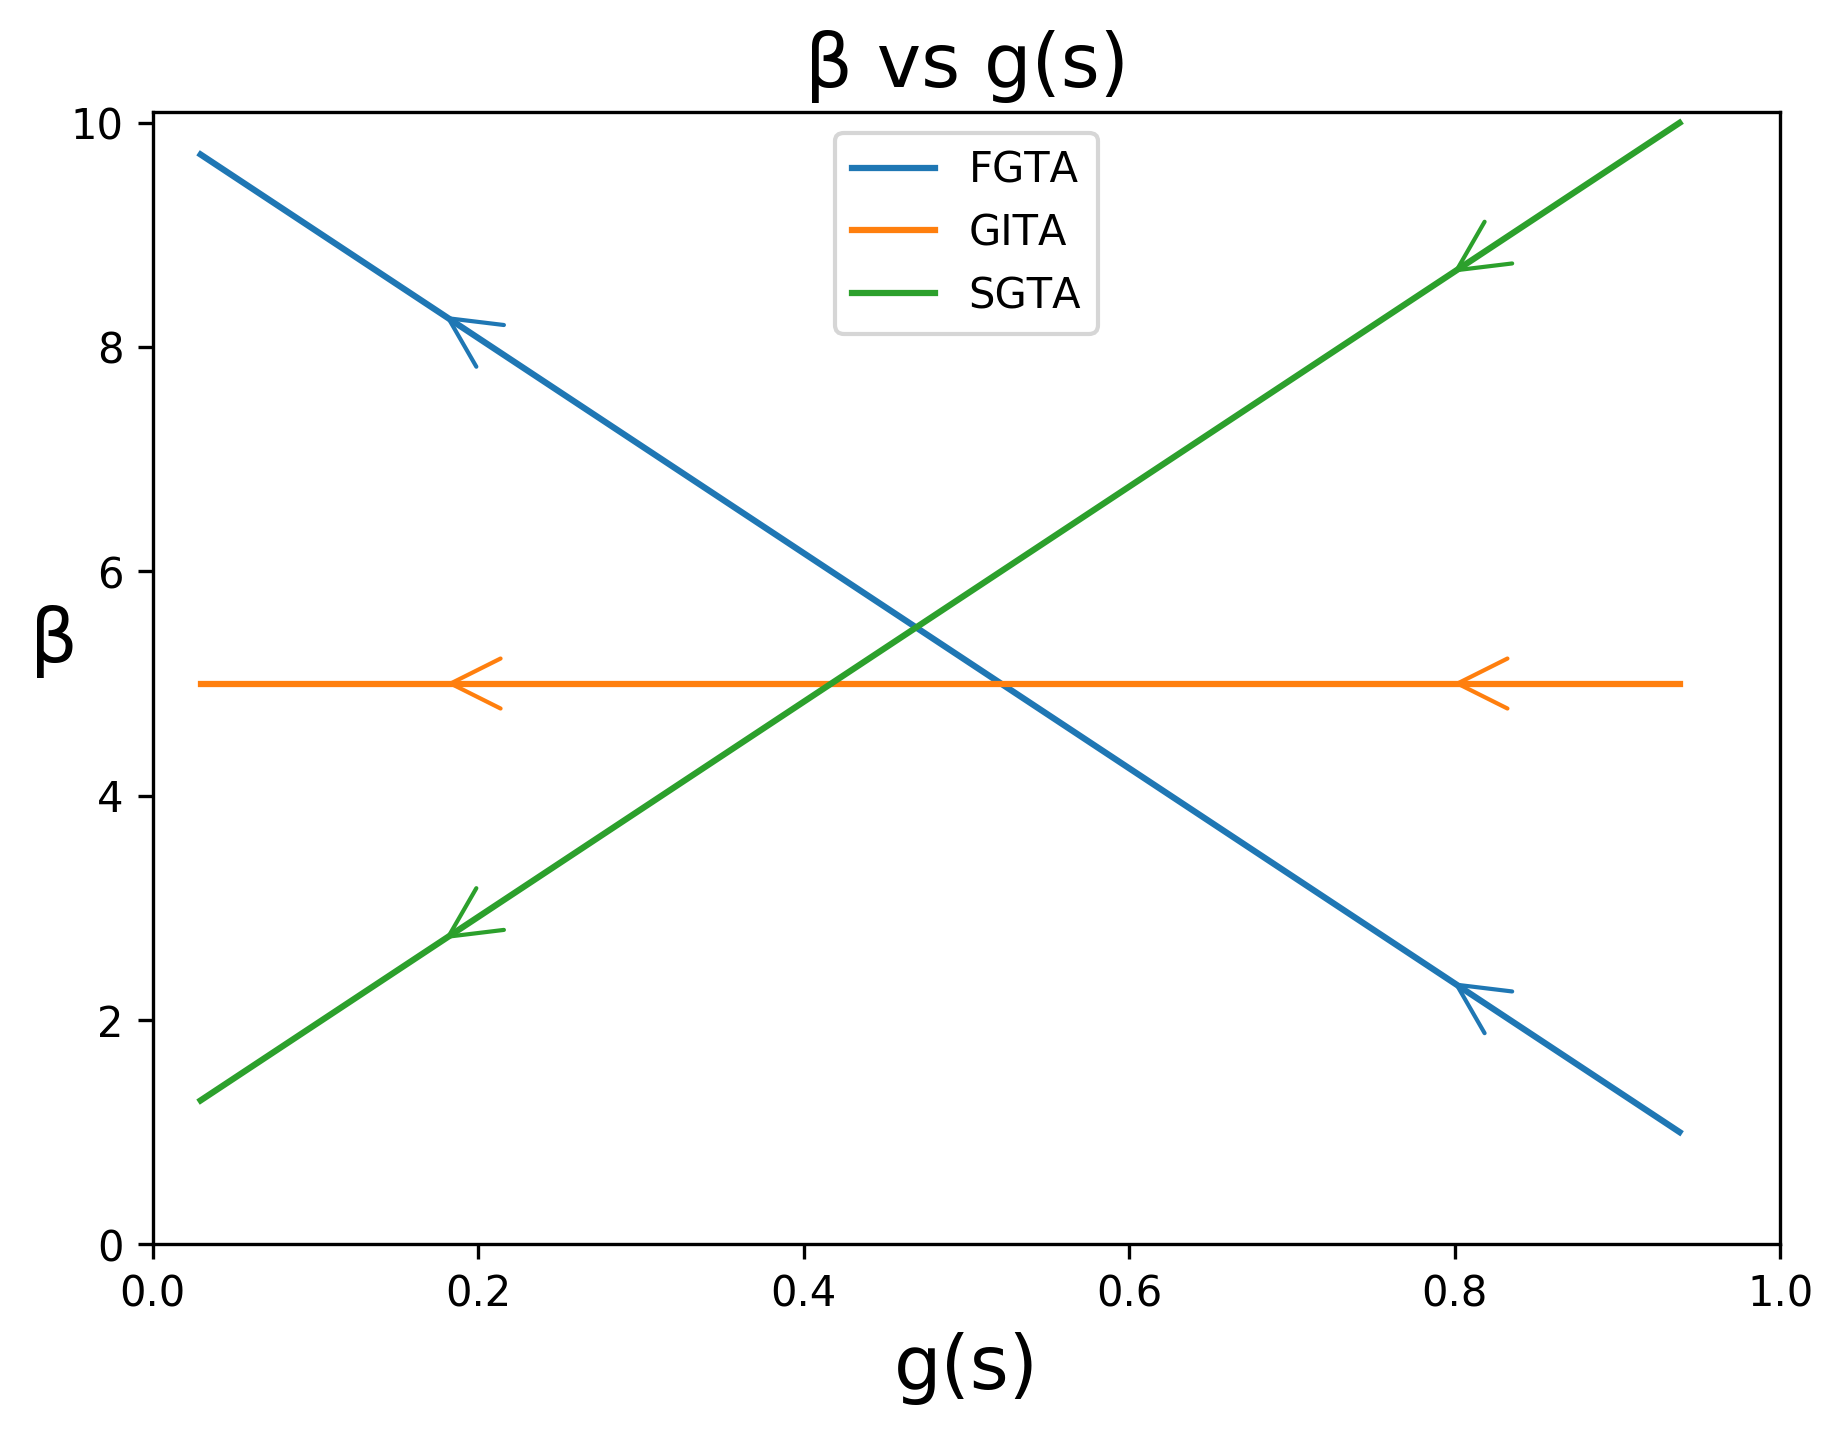

In [81]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )






def plotBetasOverTime():
    
    K = 33.
    S_max = 500
    mu_max = S_max/(K + S_max)
    
    S = list(range(500, 0, -1))
    mu = [x/y for x, y in zip(S, [K+s for s in S])]
    #print(mu)
    betaFGTA = [10. - 9.*m/mu_max for m in mu]
    betaGITA = [5 for m in mu]
    betaSGTA = [1. + 9.*m/mu_max for m in mu]
    
    plt.figure(figsize=(7,5), dpi=300)
    
    lineFGTA = plt.plot(mu, betaFGTA, label = 'FGTA')[0]
    lineGITA = plt.plot(mu, betaGITA, label = 'GITA')[0]
    lineSGTA = plt.plot(mu, betaSGTA, label = 'SGTA')[0]
    add_arrow(lineFGTA, position=0.2, size=30)
    add_arrow(lineGITA, position=0.2, size=30)
    add_arrow(lineSGTA, position=0.2, size=30)
    add_arrow(lineFGTA, position=0.8, size=30)
    add_arrow(lineGITA, position=0.8, size=30)
    add_arrow(lineSGTA, position=0.8, size=30)
    
    plt.title('β vs g(s)', fontsize=18)
    plt.ylabel('β', fontsize=18, rotation=0)
    plt.xlabel('g(s)', fontsize=18)
    plt.ylim(0, 10.1)
    plt.xlim(0, 1.0)
    
    plt.legend(loc='upper center')
    plt.show()
    
    
plotBetasOverTime()   
    
    